# ISOMAP Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.utils.graph_shortest_path import graph_shortest_path

Реализуем алгоритм ISOMAP

In [ ]:
def get_distance_matrix(data):
    distance_matrix = np.array([[np.linalg.norm(i - j) for j in data] for i in data])
    return distance_matrix


def get_knn_distance_matrix(distance_matrix, k=6):
    knn = distance_matrix.argsort()[:,1:k+1]
    knn_distance_matrix = np.zeros_like(distance_matrix)

    for point, knn_point in enumerate(knn):
        knn_distance_matrix[point, knn_point] = distance_matrix[point, knn_point]

    return knn_distance_matrix


def get_shortest_path_matrix(knn_distance_matrix):
    shortest_path_matrix = graph_shortest_path(knn_distance_matrix, directed=False)
    return shortest_path_matrix


def mds(distance_matrix, dim=2):
    # https://en.wikipedia.org/wiki/Multidimensional_scaling

    D_2 = distance_matrix ** 2

    C = np.eye(len(D_2)) - (1 / len(D_2)) * np.ones((len(D_2), len(D_2)))
    B = -1 / 2 * C.dot(D_2).dot(C)

    eig_val, eig_vec = np.linalg.eig(B)

    E = eig_vec[:, eig_val.argsort()[:-3:-1]]
    S = np.diag(eig_val[eig_val.argsort()[:-3:-1]])
    X = E.dot(S ** 0.5)

    return X


def isomap(data, k=6):
    # https://en.wikipedia.org/wiki/Isomap

    # построим матрицу евклидовых расстояний между точками 
    distance_matrix = get_distance_matrix(data)

    # построим матрицу смежности для графа k ближайших соседей
    knn_distance_matrix = get_knn_distance_matrix(distance_matrix, k)

    # построим матрищу кратчайших расстояний
    shortest_path_matrix = get_shortest_path_matrix(knn_distance_matrix)

    # рассчитаем координаты двумерной размерности
    dimred_data = mds(shortest_path_matrix)

    return dimred_data

Проверим работу алгоритма

Сгенерируем набор данных "швейцарский рулет" из 5000 точек и визуализирум его в 3d проекции

In [ ]:
data, target = datasets.make_swiss_roll(n_samples=5000)

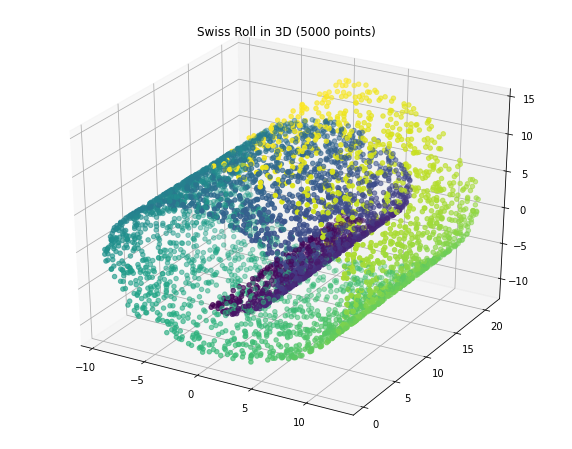

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*data.T, c=target)
plt.title(f'Swiss Roll in 3D ({len(data)} points)')
plt.show()

Теперь применим к данным алгоритм ISOMAP и визуализируем результат в 2d проекции

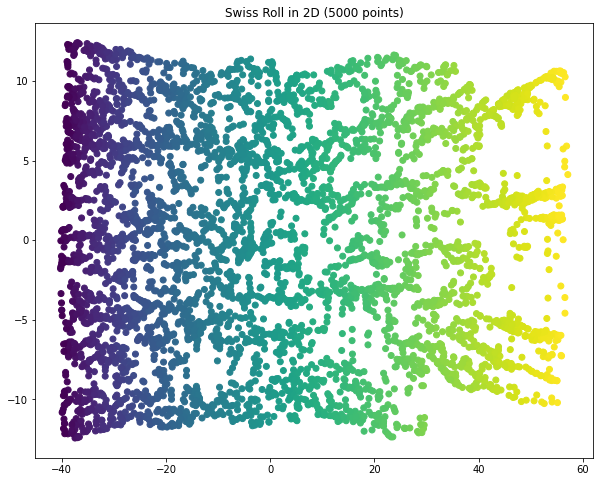

In [ ]:
fig = plt.figure(figsize=(10,8))
dimred_data = isomap(data)
plt.scatter(*dimred_data.T, c=target)
plt.title(f'Swiss Roll in 2D ({len(data)} points)')
plt.show()

Получилось хорошо! Алгоритм "развернул рулет", а не спроецировал спираль. Теперь загрузим и визуализируем [набор данных рукописных чисел](https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset
), где каждый объект имеет размерность 64

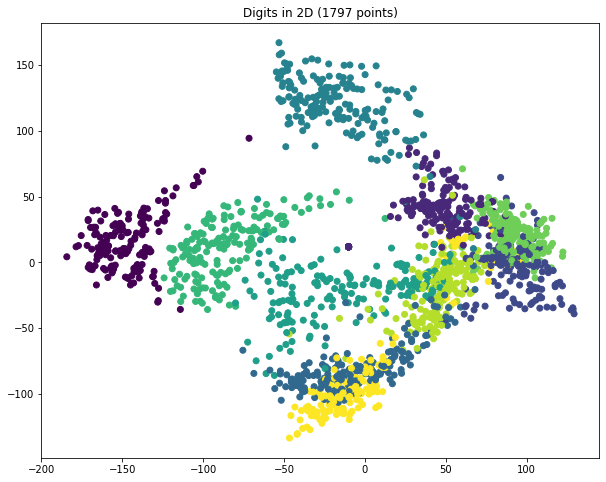

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

fig = plt.figure(figsize=(10,8))
dimred_data = isomap(digits.data)
plt.scatter(*dimred_data.T, c=digits.target)
plt.title(f'Digits in 2D ({len(digits.data)} points)')
plt.show()